## Import Libraries

In [444]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

# Misc
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)

print("Setup Complete")

Setup Complete


# Importing Data_Set

In [445]:
#train_datafile = pd.read_csv('train.csv')
house = pd.read_csv('train.csv', index_col='Id')
house.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploring Dataset


In [446]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [447]:
house.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [448]:
#Showing categorical data
house.select_dtypes(include="O")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [449]:
#number of missing values in each column
house.isnull().sum()[house.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [450]:
# Calculate the percentage of missing data for each column and show the highst percentage of them
missing_percentage = (house.isnull().sum() / len(house)) * 100
missing_info = pd.DataFrame({
    'Column': house.columns,
    'Missing Percentage': missing_percentage
})
missing_info_sorted = missing_info.sort_values(by='Missing Percentage', ascending=False)
print("Percentage of Missing Data in Each Column:")
print(missing_info_sorted.head(10))

Percentage of Missing Data in Each Column:
                    Column  Missing Percentage
PoolQC              PoolQC           99.520548
MiscFeature    MiscFeature           96.301370
Alley                Alley           93.767123
Fence                Fence           80.753425
FireplaceQu    FireplaceQu           47.260274
LotFrontage    LotFrontage           17.739726
GarageYrBlt    GarageYrBlt            5.547945
GarageCond      GarageCond            5.547945
GarageType      GarageType            5.547945
GarageFinish  GarageFinish            5.547945


In [451]:
#columns ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'] have high percentage of missing values , so we should drop them
columns_to_drop = [ 'PoolArea','PoolQC','MiscFeature', 'Alley', 'Fence', 'MasVnrType']
house.drop(columns=columns_to_drop, axis=1, inplace=True)

## Handling missing values

In [452]:
#selecting numerical columns 
num_cols = house.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    house[col].fillna(house[col].median(),inplace = True)


In [453]:
#ensuring that all values was filled
missing_values_count = house.select_dtypes(include='number').isnull().sum()
#print(missing_values_count)

In [454]:
non_null_cols = house.isnull().any()[house.isnull().any() == True].index

for col in non_null_cols:
    house[col].fillna('No',inplace = True)

In [455]:
for column in house.columns:
    missing_values_count = house[column].isnull().sum()
    #print(f"Number of missing values in {column}: {missing_values_count}")

## Feature extraction

In [456]:
#make a new column for house's age and garage's age
current_year = datetime.now().year
house['HouseAge'] = current_year - house['YearBuilt']

house['GarageAge'] = current_year - house['GarageYrBlt']


#make a new column for house's total bathrooms
house['TotalBathrooms'] = house['BsmtFullBath'] + house['BsmtHalfBath'] + house['FullBath'] + house['HalfBath']


#Create a feature representing the total outdoor living area
house['OutdoorArea'] = house['WoodDeckSF'] + house['OpenPorchSF'] + house['EnclosedPorch'] + house['3SsnPorch'] + house['ScreenPorch']


house.drop(['YearBuilt', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'],axis=1,inplace=True)

## Showing information about our data

<Figure size 700x500 with 0 Axes>

<Axes: xlabel='SalePrice', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Sale Prices')

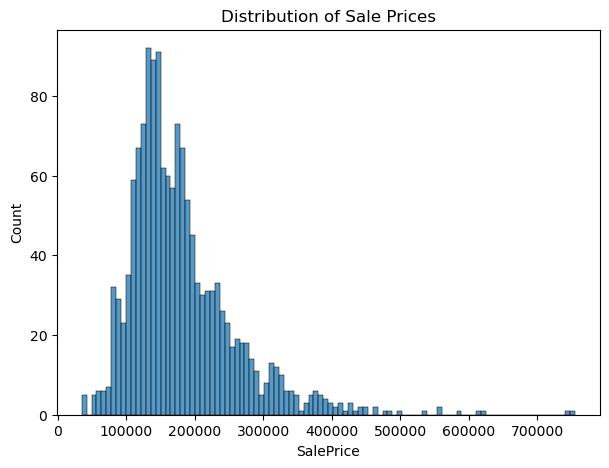

In [457]:
plt.figure(figsize=(7, 5))
sns.histplot(house['SalePrice'], bins=100, line_kws={'alpha': 0.4})
plt.title('Distribution of Sale Prices')

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>],
       [<Axes: title={'center': 'BedroomAbvGr'}>,
        <Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center':

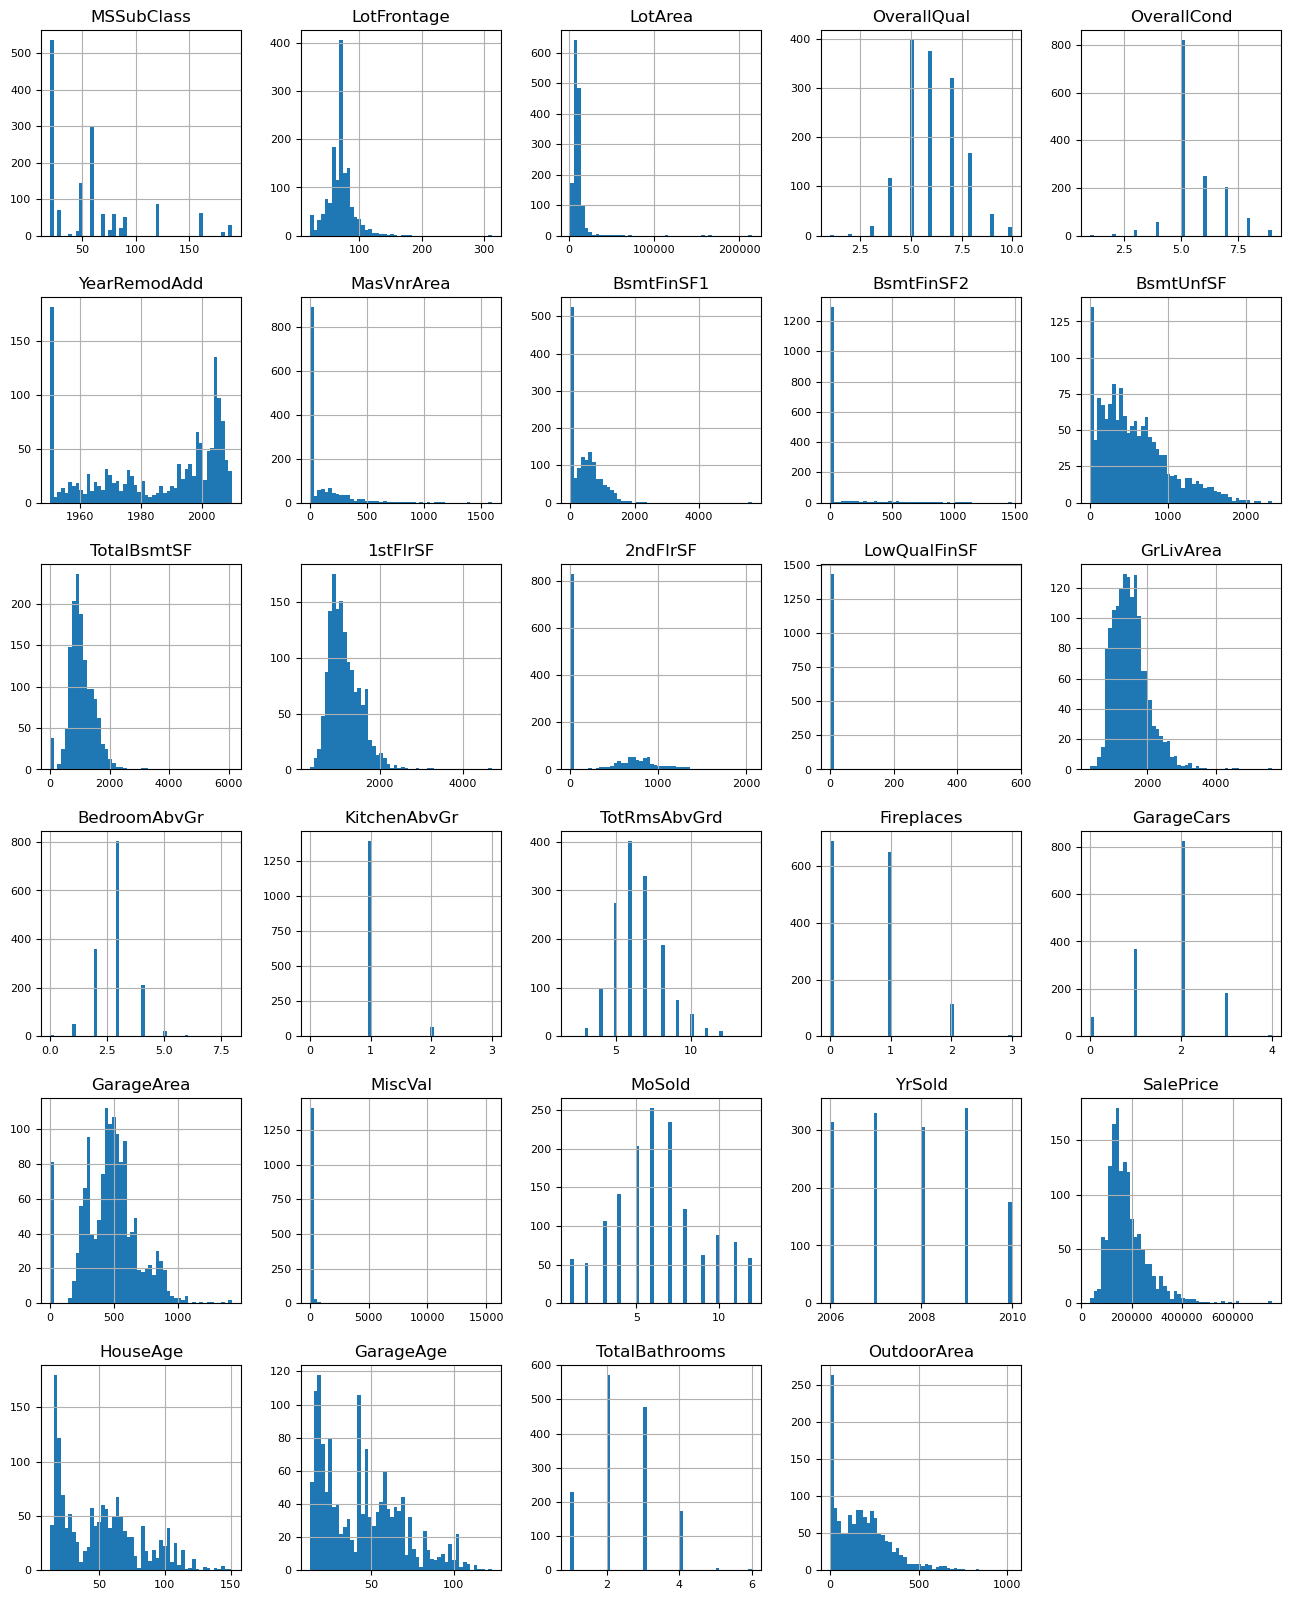

In [458]:
hdata = house.select_dtypes(include=['int64', 'float64'])
hdata.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Figure size 7000x3400 with 0 Axes>

<Axes: >

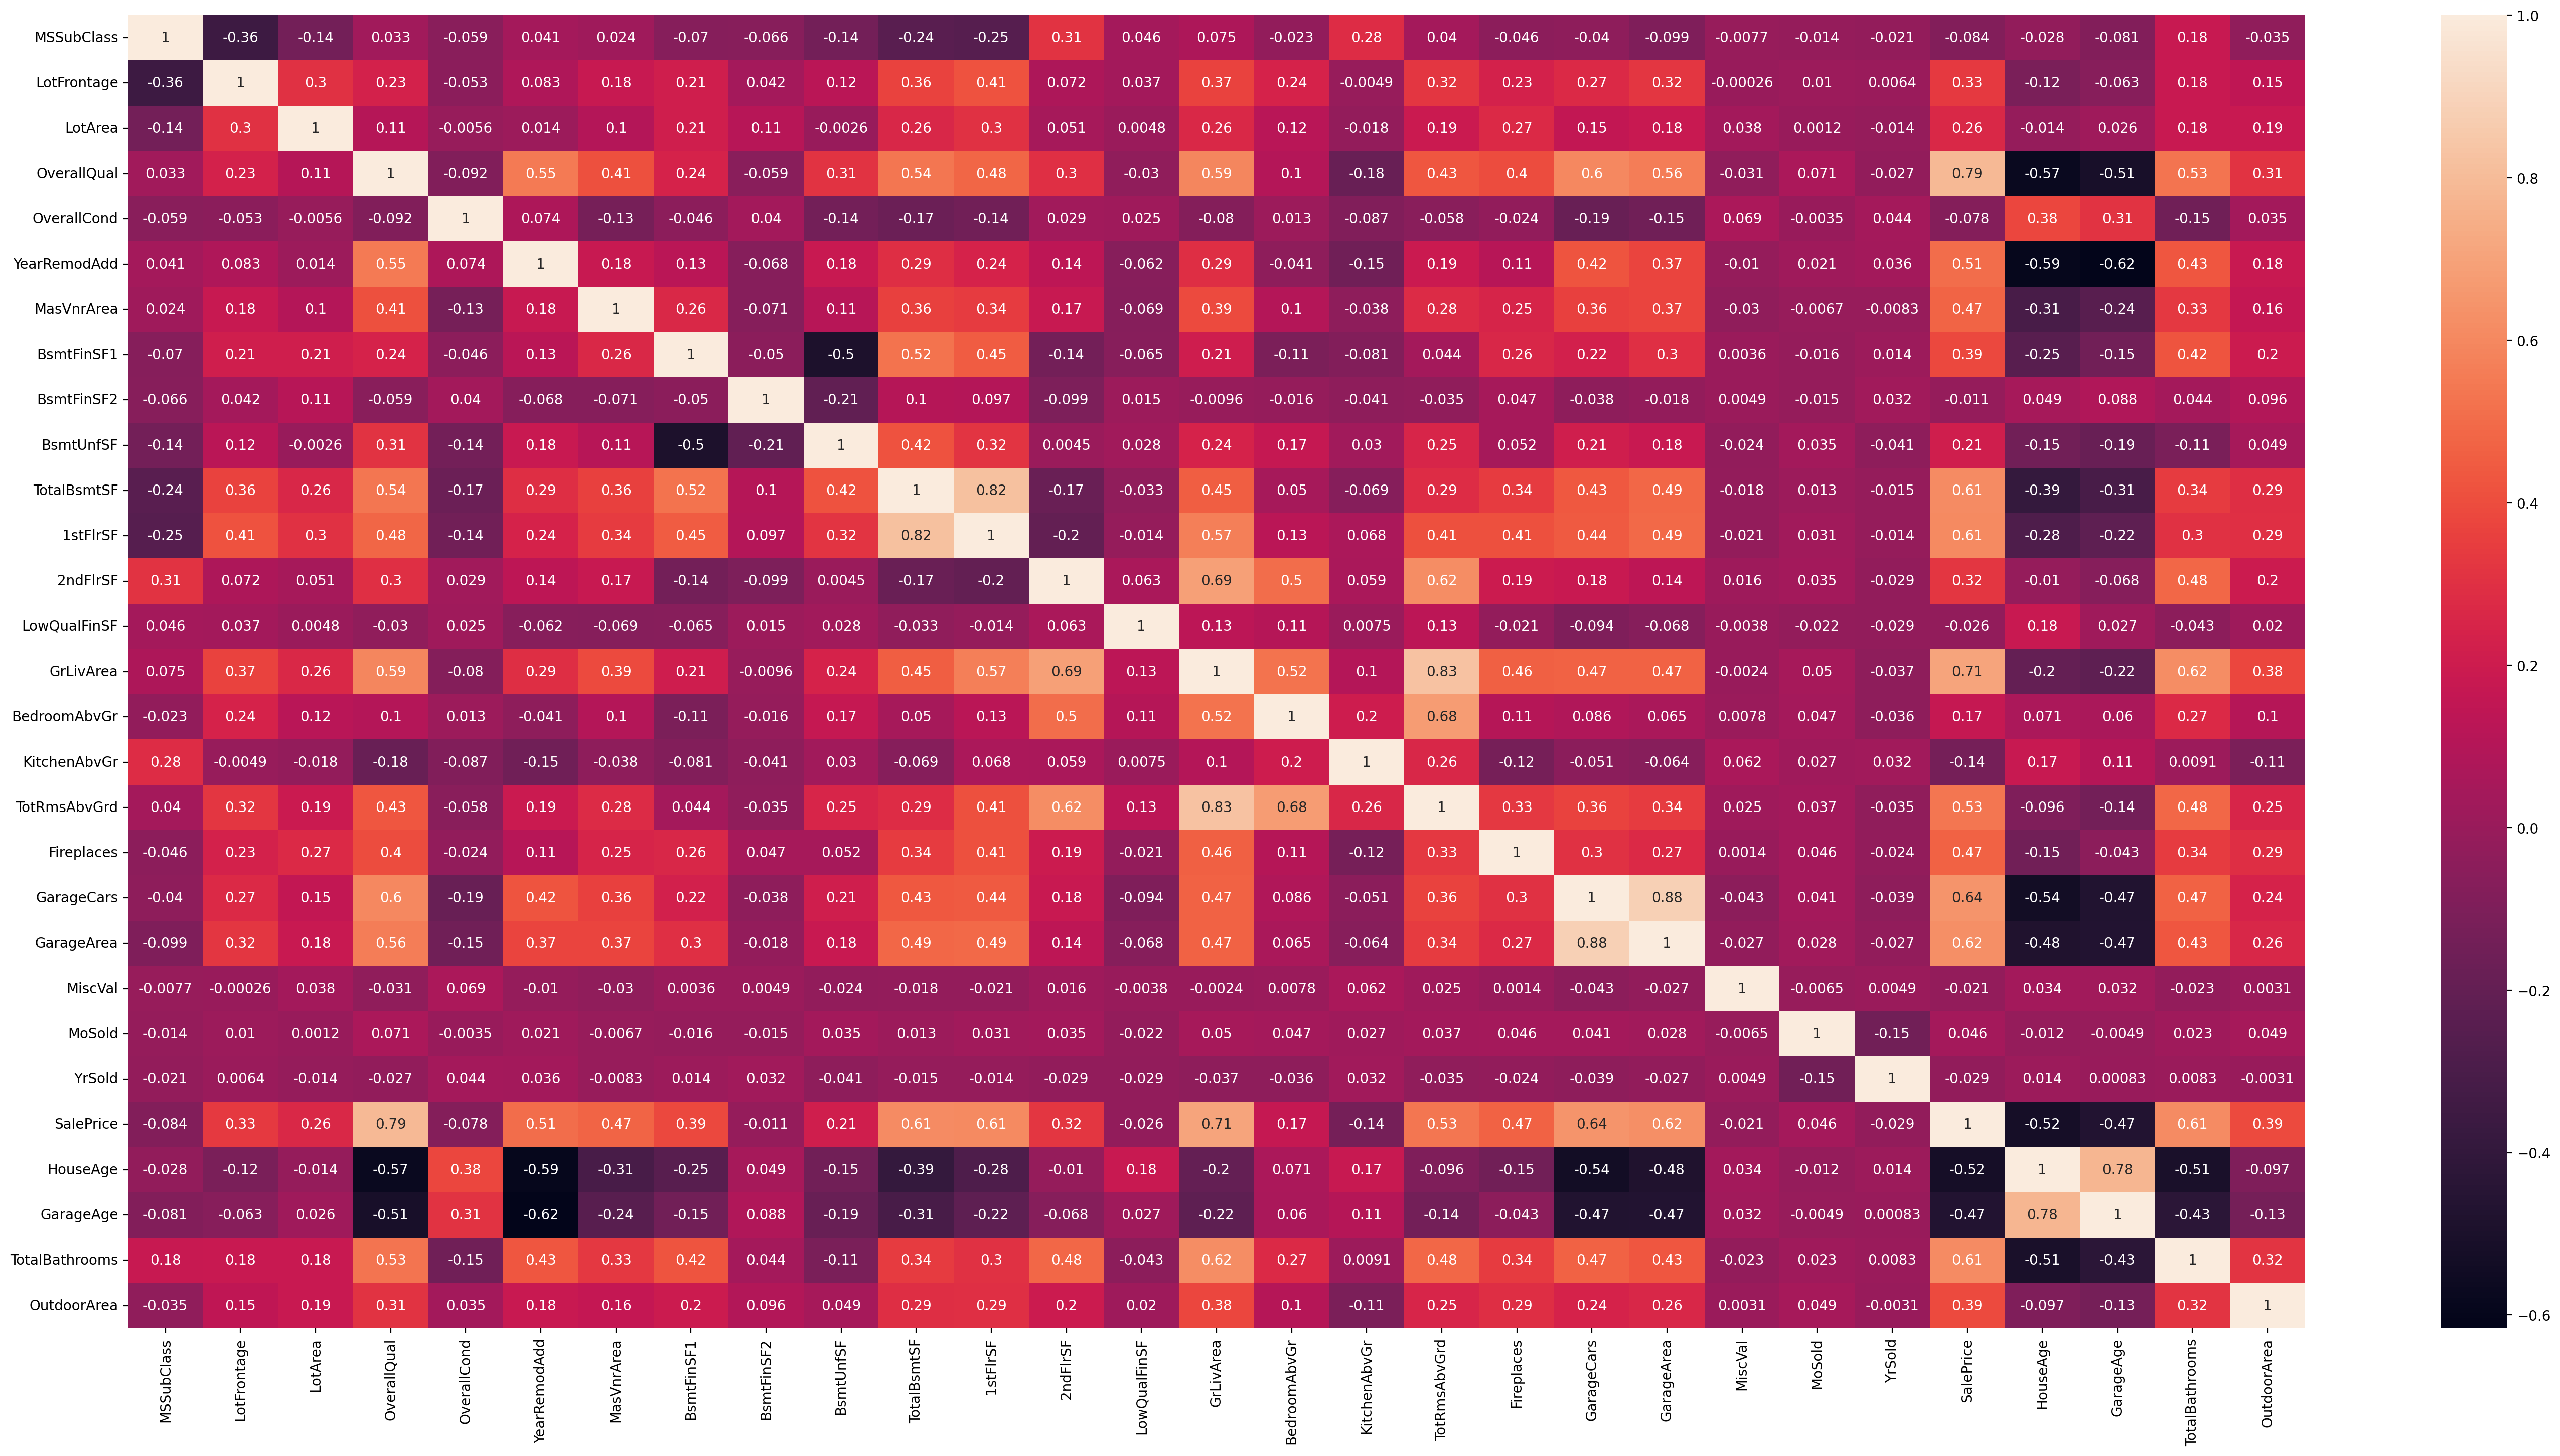

In [459]:
plt.figure(figsize=(35,17),dpi=200)
sns.heatmap(hdata.corr(),annot=True)

In [460]:
hdata.corr()['SalePrice'].sort_values(ascending=False)
columns_to_remove = hdata.corr()[((hdata.corr()['SalePrice']) < 0.1) & ((hdata.corr()['SalePrice']) > -0.1)].index
house.drop(columns=columns_to_remove, inplace=True)
print(columns_to_remove)

SalePrice         1.000000
OverallQual       0.790982
GrLivArea         0.708624
GarageCars        0.640409
GarageArea        0.623431
TotalBsmtSF       0.613581
TotalBathrooms    0.613005
1stFlrSF          0.605852
TotRmsAbvGrd      0.533723
YearRemodAdd      0.507101
MasVnrArea        0.472614
Fireplaces        0.466929
OutdoorArea       0.390993
BsmtFinSF1        0.386420
LotFrontage       0.334771
2ndFlrSF          0.319334
LotArea           0.263843
BsmtUnfSF         0.214479
BedroomAbvGr      0.168213
MoSold            0.046432
BsmtFinSF2       -0.011378
MiscVal          -0.021190
LowQualFinSF     -0.025606
YrSold           -0.028923
OverallCond      -0.077856
MSSubClass       -0.084284
KitchenAbvGr     -0.135907
GarageAge        -0.466754
HouseAge         -0.522897
Name: SalePrice, dtype: float64

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


## Encoding Categorical columns

In [461]:
#print the categorical columns
bob = house.select_dtypes(include=['object']).columns.tolist()
bob

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [462]:
columns_to_concat = ['MSZoning','Neighborhood']
house['Location Information'] = house[columns_to_concat].astype(str).agg('-'.join, axis=1)
house.drop(columns=['MSZoning','Neighborhood'], inplace=True)

#columns_too_concat = ['MSSubClass','HouseStyle']
#house['House Type and Style'] = house[columns_to_concat].astype(str).agg('-'.join, axis=1)
#house.drop(columns=['MSSubClass','HouseStyle'], inplace=True)


In [463]:
bob = house.select_dtypes(include=['object']).columns.tolist()
encoder = LabelEncoder()
for col in bob:
    house[col] = encoder.fit_transform(house[col])

## Split data into training and testing sets

In [464]:
X = house.drop('SalePrice',axis=1)
y = house.SalePrice
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2, random_state=2)


In [465]:
# Scale The data if needed 

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [466]:

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [467]:
model_1.score(X_train,y_train)
model_1.score(X_test,y_test)

0.8295730727165076

0.8811090510664074

In [468]:

y_pred = model_1.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(f'Accuracy: {100*accuracy:.2f}%')

Accuracy: 88.11%


In [469]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [470]:
knn.score(X_train,y_train)
knn.score(X_test,y_test)

0.8215553261387971

0.6666852748125337

In [471]:
y_pred = knn.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print(f'Accuracy: {100*accuracy:.2f}')

Accuracy: 66.67


In [472]:
knn = KNeighborsRegressor(n_neighbors=8,p=1)

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [8, 20, 10],  # Adjust as needed
    'weights': ['uniform', 'distance'],  # Adjust as needed
    'p': [1, 2]  # Adjust as needed (p=1 for Manhattan distance, p=2 for Euclidean distance)
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

c:\Users\haazm\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=8, p=1), n_jobs=-1,
             param_grid={'n_neighbors': [8, 20, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [473]:
scores = cross_val_score(knn,X,y,cv=5)
print (scores)
scores.mean()
# perfom cross validation for each fold and get the mean of all scores 

[0.70560839 0.75293112 0.69947347 0.72281363 0.62628896]


0.7014231140762153

In [474]:
best_knn = grid_search.best_estimator_
print(best_knn)

KNeighborsRegressor(n_neighbors=8, p=1)


In [475]:
best_knn.score(X_test,y_test)

0.7174452364519759

In [476]:
y_pred2 = best_knn.predict(X_test)
accuracy = r2_score(y_test, y_pred2)
print(f'Accuracy: {100*accuracy:.0f}%')

Accuracy: 72%
